<a href="https://colab.research.google.com/github/karagullemre/rnn/blob/master/Lecture_03_Maximum_Likelihood_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center><font color=navy>ECON 4984: Big Data Economics</font></center>
### <center>Maximum Likelihood Estimation (MLE)</center>
#### <center>Ali Habibnia, habibnia@vt.edu</center>
#### <center>Virginia Tech, Fall 2019</center>



### <center>Linear Regression : The Probabilistic Perspective</center>

Probability is a great way to express the relationship between the data and the model, concisely. We are familiar with how Linear Regression works. We know the loss function just tries to minimize the quadratic distance between data points and the model (line). Today, we will revisit Linear Regression from a probabilistic perspective, using a method known as the Maximum Likelihood estimation.

<center>
<img src="https://raw.githubusercontent.com/nimamox/bigdata-nb-files/master/Week3/images/lr2.png"  width="600">
</center>




## Readings:

1. ***Chapter 8.2*** [The Elements of Statistical Learning: Data Mining, Inference, and Prediction](https://web.stanford.edu/~hastie/ElemStatLearn/printings/ESLII_print12.pdf). 
2. For a quick review see: ***Chapter 24.1***, Understanding Machine Learning From Theory to Algorithms.
3. Nando de Fretais’s [lecture](https://www.youtube.com/watch?v=voN8omBe2r4)

> In simple terms, MLE lets us choose a model (parameters) that explains the data (sample set) better than all other models. For any given regression model, the objective function can be derived based on the principle of Maximum Likelihood.

- Maximum Likelihood Estimation or MLE is a tool based on probability. 
- Probability is a framework for meauring and managing uncertainty. 
- Every inference we make, has some degree of uncertainty associated with it. 
- It is essential for us to quantify this uncertainty.

## Normal (Gaussian) Distribution

A probability distribution is a function that provides us the probabilities of all possible outcomes of a stochastic process. The most commonly occurring distribution is the Gaussian Distribution or the Normal Distribution.

The gaussian distribution is a means to measure the uncertainty of a variable that is continuous between $-\infty$ and $+\infty$. The distribution is centered at mean, $\mu$. The width (dispersion) of the distribution depends on the parameter $\sigma$, the standard deviation (variance, $\sigma^2$). Naturally, the area under the curve equals $1$.

<center>
<img src="https://raw.githubusercontent.com/nimamox/bigdata-nb-files/master/Week3/images/normal1.png"  width="600">
</center>


Probability Density Function (pdf) = $f(x)=\frac{1}{\sqrt{2 \pi \sigma^{2}}} e^{\frac{-(x-\mu)^{2}}{2 \sigma^{2}}}$


Cumulative Distribution Function (cdf) = $F(x)=\int_{-\infty}^{x} \frac{1}{\sqrt{2 \pi \sigma^{2}}} e^{\frac{-(x-\mu)^{2}}{2 \sigma^{2}}} d x$

Where $\mu$ is the population mean and $\sigma$ is the population standard deviation.

> ##### Do you recall what the "Standard Normal Distribution" is?

## How is Gaussian Distribution relevant to linear regression? 

The data points in the sample set, do not accurately represent the original data generating distribution or process. Hence we consider it as a stochastic process and build our model to accomodate a certain level of uncertainty. Every data point can be considered a random variable sampled from an underlying data-generating distribution which we assume to be gaussian. By that logic, estimation is basically recreating the original distribution that generated the sample data (via finding its parameters).

## Random Sampling
The process of sampling from a normal distribution is expressed as, $x∼N(μ,σ^2)$. ‘$x$’ is a random variable sampled or generated or simulated from the guassian distribution. As we sample from this distribution, most samples will fall around the center, near the mean, because of higher probability density in the center; this is essentially what the bell-shaped curve of the normal distribution conveys.

<center>
<img src="https://raw.githubusercontent.com/nimamox/bigdata-nb-files/master/Week3/images/sampling1.png"  width="600">
</center>


## Multivariate Gaussian

The 2D gaussian distribution or bivariate distribution, consists of 2 random variables $x_1$ and $x_2$. The Multivariate Gaussian Distribution is a generalization of bivariate distribution, for ‘$k$’ dimensions. The shape of this distribution function depends on its mean vector and covariance matrix.

A multivariate normal distribution of a $k$-dimensional random vector $\mathbf{X} = (X_1,\ldots,X_k)$ is written as $\mathbf{X}\ \sim\ \mathcal{N}_k(\boldsymbol\mu,\, \boldsymbol\Sigma)$ with $k$-dimensional mean vector $\boldsymbol\mu = \operatorname{E}[\mathbf{X}] = ( \operatorname{E}[X_1], \operatorname{E}[X_2], \ldots, \operatorname{E}[X_k] )$, and $k\times k$ covariance matrix $\Sigma_{i,j} := \operatorname{E} [(X_i - \mu_i)( X_j - \mu_j)] = \operatorname{Cov}[X_i, X_j]$

A visualization of the bivariate normal distribution, along its probability distribution function is depicted below:

<center>
<img src="https://raw.githubusercontent.com/nimamox/bigdata-nb-files/master/Week3/images/bivariate3d.png"  width="600">
</center>

<center>
<img src="https://raw.githubusercontent.com/nimamox/bigdata-nb-files/master/Week3/images/bivariatepdf.png"  width="350">
</center>






### Maximum Likelihood

Consider three data points, $y_1=1$, $y_2=0.5$, $y_3=1.5$, which can be assumed to be independent and drawn from a identical guassian distribution with unknown mean $\theta$, but known variance $1$. 

Let’s say we have two choices for $\theta: \{1, 2.5\}$. Which one would you choose? Which model ($\theta$) would explain the data better?

In general, any data point drawn from a gaussian with mean $\theta$ and and variance $1$, can be written as,

### $y_i∼\mathcal{N}(θ,1)=θ+\mathcal{N}(0,1)$

$\theta$, the mean, shifts the center of the standard normal distribution ($\mu=0$ and $\sigma^2=1$).

The likelihood of data $(y_1,y_2,y_3)$ having been drawn from $\mathcal{N}(\theta,1)$, can be defined as,

### $P(y_1,y_2,y_3|\theta) = P(y_1|\theta)P(y_2|\theta)P(y_3|\theta)$

as $y_1,y_2,y_3$ are independent.

Now, we have two normal distributions defined by $\theta = 1$ and $\theta = 2.5$. Let us draw both and plot the data points. In the figure below, notice the dotted lines that connect the bell curve to the data points. Consider the point $y_2=0.5$ in the first distribution( $\mathcal{N}(\mu=1,\sigma^2=1)$ ). The length of the dotted line gives the probability of the $y_2=0.5$ being drawn from $\mathcal{N}(\mu=1,\sigma^2=1)$.

<center>
<img src="https://raw.githubusercontent.com/nimamox/bigdata-nb-files/master/Week3/images/toy-eg.png"  width="400">
</center>

The likelihood of data $(y_1,y_2,y_3)$ having been drawn from $N(\mu=1,\sigma^2=1)$, is given by,

### $P(y_1,y_2,y_3|\theta=1) = P(y_1|\theta=1)P(y_2|\theta=1)P(y_3|\theta=1)$

The individual probabilities in the equation above, are equal to the heights of corresponding dotted lines in the figure. 

**We see that the likelihood, given by the product of individual probabilities of data points given model, is basically the product of lengths of dotted lines.**
 
It is obvious that the likelihood of model $\theta=1$ is higher. We choose the model ($\theta=1$), that maximizes the likelihood.


### Linear Regression

We are ready to apply MLE to linear regression, where the objective is to find the best line that fits the data points. But first, let us make some assumptions. We assume each label, $y_i$, is gaussian distributed with mean, $x_i^T\theta$ and variance, $\sigma^2$, given by

$$y_i = \mathcal{N}(x_i^T\theta,\sigma^2) = x_i^T\theta + \mathcal{N}(0,\sigma^2)\\
prediction\colon \hat{y}_i = x_i^T\theta$$

The mean, $x_i^Tθ$ represents the best fit line. The data points will vary about the line, and the second term, captures this variance, $N(0,σ^2)$

<center>
<img src="https://raw.githubusercontent.com/nimamox/bigdata-nb-files/master/Week3/images/lr1.png"  width="600">
</center>


### Estimation

If we assume that each point $y_i$ is gaussian distributed, the process of estimation becomes the process of maximizing the product of the individual probabilities, which is equivalent to maximizing the log likelihood. We switch to log space, as it is more convenient and it removes the exponential in the gaussian distribution.

<center>
<img src="https://raw.githubusercontent.com/nimamox/bigdata-nb-files/master/Week3/images/lr2.png"  width="600">
</center>

As the data points are independent, we can write the joint probability distribution of $y,\theta,\sigma$ as,

$$p(y|X,\theta,\sigma) = \prod_{i=1}^n p(y_i|x_i,\theta,\sigma)\\
p(y|X,\theta,\sigma) = \prod_{i=1}^n(2\pi \sigma^2)^{-2/2}{\rm e}^{-\frac{1}{2\sigma^2}(y_i-x_i^T\theta)^2}$$




rewriting in matrix form,

$$p(y|X,\theta,\sigma) = (2\pi \sigma^2)^{-n/2}{\rm e}^{-\frac{1}{2\sigma^2}(y-X\theta)^T (y-X\theta)}$$


Log likelihood,

$$l(\theta) = -\frac{n}{2}\log(2\pi \sigma^2) - \frac{1}{2\sigma^2}(Y-X\theta)^T(Y-X\theta)$$


The first term is a constant and the second term is a parabola, the peak (maxima) of which can be found by equating the derivative of $l(\theta)$ to zero. Equating first derivative to zero, we get,
$$\frac{dl(\theta)}{d\theta} = 0 = -\frac{1}{2\sigma^2}(0-2X^TY+X^TX\theta)$$


we get,

$$\hat{\theta}_{ML} = (X^TX)^{-1}X^TY$$

Finally, we reach our goal of finding the best model for linear regression. This equation is commonly known as the normal equation. **The same equation can be derived using the least squares method.**

# Showcase:  Maximum Likelihood Estimation to fit a linear (polynomial) model to some data points


Again, we first start by implementing LR with MLE parameter estimation to get a better understanding of the procedure. The synthetic data-generating process of ours will be a quadratic function with some noise, that we want to model with linear regression.

In [ ]:
import numpy as np
import math

x = np.linspace(0.0,10.0, num=100)
a = 4.0
b = -3.5
c = 0.0
y = (a*(x**2)) + (b*x) + c

#   let's add noise to the data
#   np.random.normal(mean, standardDeviation, num)
noise = np.random.normal(0, 10., 100)
y = y+noise

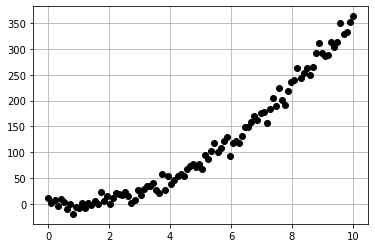

<Figure size 432x288 with 0 Axes>

In [ ]:
#   plot my data
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x,y, 'ok')
plt.grid(True)
plt.show()
plt.savefig('myData.png', dpi=300, type='png')

In [ ]:
# define a function to calculate the log likiehood
def calcLogLikelihood(guess, true, n):
    error = true - guess
    sigma = np.std(error)
    f = (1.0 / (2.0 * math.pi * sigma * sigma)) ** (n / 2) * np.exp(-1
            * (np.dot(error.T, error) / (2 * sigma * sigma)))
    return np.log(f)

In [ ]:
# define my function which will return the objective function to be minimized
def myFunction(var):
    yGuess = var[2] * x ** 2 + var[1] * x + var[0]
    f = calcLogLikelihood(yGuess, y, float(len(yGuess)))
    return -1 * f


In [ ]:
# Let's pick some random starting points for the optimizaiton    
nvar = 3
var = np.zeros(nvar)
var[0] = -15.5
var[1] = 19.5
var[2] = -1.0

In [ ]:
# Let's maximize the liklihood (minimize -1*max(likelihood)
from scipy.optimize import minimize
res = minimize(myFunction, var, method='BFGS',
                options={'disp': True})

         Current function value: 379.006391
         Iterations: 14
         Function evaluations: 156
         Gradient evaluations: 31


In [ ]:
#   perfrom least squres fit using scikitlearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression(fit_intercept=False))])

model = model.fit(x[:, np.newaxis], y)
coefs = model.named_steps['linear'].coef_

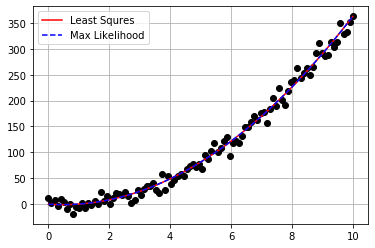

<Figure size 432x288 with 0 Axes>

In [ ]:
#   plot the data and model fits
plt.figure()
plt.plot(x,y, 'ok')
plt.plot(x,model.predict(x[:,np.newaxis]), '-r', label='Least Squres')
plt.plot(x,(res.x[2]*(x**2)) + (res.x[1]*x) + res.x[0], '--b', label='Max Likelihood')
plt.grid(True)
plt.legend(loc=2)
plt.show()
plt.savefig('maxLikelihoodComp.png', dpi=300, type='png');